In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.linear_model import LassoCV,LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Part 1

## Load the data and perform EDA

In [3]:
df = pd.read_csv('./car-mpg.csv')
print(df.shape)

pp.ProfileReport(df)

(398, 9)

In [61]:
# As part of the above analysis we can drop the following columns
dfa = df.drop(columns=['car_name','disp','hp'])
dfa.columns

cat_columns = ['cyl','origin']
num_columns = ['acc','year']

X = dfa.drop(columns=['mpg'])
y = dfa['mpg']
print(dfa.head())

Index(['mpg', 'cyl', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [64]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
mpg       398 non-null float64
cyl       398 non-null int64
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(2), int64(4)
memory usage: 18.7 KB


# Part 2

## Perform all the various feature selection techniques

We can select features using the following techniques:
    - Checking the correlation 
    - Using lasso regression for feature elimination 
    - RFE (Recursive feature elimination)
    - Forward selection and Backward elimination

### Method 1: Using correlation

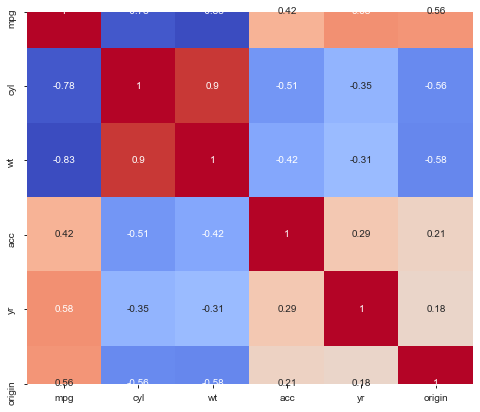

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(dfa.corr(),cmap='coolwarm',annot=True,square=True,cbar=False)
plt.show()

In [75]:
dfa.corr()['mpg'].sort_values(ascending=False)

mpg       1.000000
yr        0.579267
origin    0.563450
acc       0.420289
cyl      -0.775396
wt       -0.831741
Name: mpg, dtype: float64

### Method 2: Lasso regression for feature elimination

In [78]:
alphas = np.linspace(0.01,0.1,30)
lasso = LassoCV(alphas=alphas,cv=3)
lasso.fit(X,y)
print('Best alpha',lasso.alpha_)

d = {'columns':X.columns,'coefficients':lasso.coef_}
pd.DataFrame(d)

Best alpha 0.04103448275862069


,columns,coefficients
0,cyl,0.012760
1,wt,-0.006017
2,acc,0.065940
3,yr,0.744382
4,origin,1.084278


### Method 3: RFE (Recursive feature elimination)

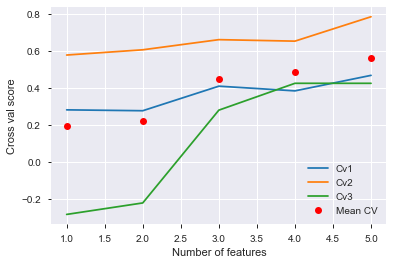

In [109]:
model = LinearRegression()
n_features, scores = [],[]

for i,_ in enumerate(X.columns,1):
    rfe = RFE(model,i).fit(X,y)
    n_features.append(i)
    scores.append(cross_val_score(rfe, X, y, cv=3))

plt.plot(n_features,scores)
plt.xlabel('Number of features')
plt.ylabel('Cross val score')
plt.grid(True)
plt.plot(n_features,np.mean(scores,axis=1),'ro')
plt.legend(['Cv1','Cv2','Cv3','Mean CV'])
plt.show()

In [124]:
rfe = RFE(model,1).fit(X,y)
d = {'column names':X.columns,'ranks':rfe.ranking_}
pd.DataFrame(d)

,column names,ranks
0,cyl,1
1,wt,5
2,acc,4
3,yr,3
4,origin,2


### Method 4: Forward selection and backward elimination

#### Forward selection

In [130]:
model = LinearRegression()
sfs1 = sfs(model,k_features=5,forward=True,scoring='r2',cv=3)

In [131]:
sfs1

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=5, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

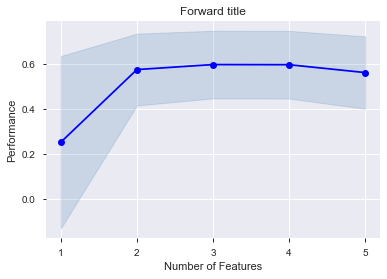

In [132]:
sfs1.fit(X,y)
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Forward title')
plt.grid(1)
plt.show()

In [135]:
sfs1.k_features, sfs1.k_feature_names_

(5, ('cyl', 'wt', 'acc', 'yr', 'origin'))

#### Backward elimination

## Provide the inferences for various methods.

1. Method 1: Here we could see high positive correlation for columns `yr` and `origin` with `mpg`.

2. Method 2: Using this method `origin` and `yr` is having the heighest positions of importance.

3. Method 3: RFE cosiders cyl as the most important feature, followed by origin and year.

4. Method 4: Choosing 3 features can be considered an optimal choice.

## Perform All the various data transformation techniques 

- Log transformation
- Square root transformation


## Provide the inferences for various methods.